# <center> Elementy numerycznej algebry liniowej </center>

Rozwiązywanie układów równań liniowych jest jednym z podstawowych problemów metod numerycznych. Układy równań liniowych występują w wielu dziedzinach nauki i inżynierii. Stosuje się też w uczeniu maszynowym np. podczas regresji z błędem średniokwadratowym. 


Istnieje kilka metod rozwiązywania układów równań. Na dzisiejszych zajęciach zajmiemy się:
* eliminacją Gaussa bez oraz z wyborem elementu głównego,
* metodami iteracyjnymi.

Problem rozwiązywania układu równań liniowych będzie nam towarzyszły do końca zajęć z tego przedmiotu.

## Normy i wskaźniki uwarunkowania

Wrażliwość układu (zmiana rozwiązania) na niewielkie zaburzenia wektora `b` zależy od macierzy `A` i ocenia się ja za pomocą tzw. współczynnika lub [wskaźnika uwarunkowania macierzy](https://pl.wikipedia.org/wiki/Wskaźnik_uwarunkowania) (ang. *condition number*). Im wyższa wartość tego wskaźnika. tym macierz jest gorzej uwarunkowana. Wskaźnik uwarunkowania to iloczyn normy macierzy z normą jej odwrotności.

$$cond(A)=|A|_{p}\cdot|A^{-1}|_{p}$$
gdzie *p* oznacza jedną z norm macierzy.

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

***Zadanie 1.***

Porównaj normy 1,2, $\infty$ następujących macierzy:
* [Hilberta](https://pl.wikipedia.org/wiki/Macierz_Hilberta): o wymiarach 5x5 i 15x15
* [Vandermonde'a](https://pl.wikipedia.org/wiki/Macierz_Vandermonde’a): o wymiarach 5x5 i 15x15
* losowej o wartościach z przedziału [0,1]:  o wymiarach 5x5 i 15x15
* $P=\left[\begin{array}{cccc}4 & 1 & -1 & 0 \\ 1 & 3 & -1 & 0 \\ -1 & -1 & 5 & 2 \\ 0 & 0 & 2 & 4\end{array}\right]$

Czy wśród powyższych macierzy jest macierz [diagonalnie dominująca](https://pl.wikipedia.org/wiki/Macierz_przekątniowo_dominująca)?


In [7]:
import numpy as np
from scipy.linalg import hilbert
from numpy.linalg import norm


def is_diagonally_dominant(A):
    """Sprawdza, czy macierz A jest przekątniowo dominująca."""
    D = np.abs(np.diag(A))
    S = np.sum(np.abs(A), axis=1) - D
    return np.all(D >= S)

def generate_vandermonde(x, n):
    """Tworzy macierz Vandermonde'a."""
    return np.vander(x, N=n, increasing=False)

# --- Przygotuj macierze ---

# Macierz Hilberta
H5 = hilbert(5)
H15 = hilbert(15)

# Macierz Vandermonde'a
x5 = np.arange(1, 6)   # [1,2,3,4,5]
x15 = np.arange(1, 16) # [1,...,15]
V5 = generate_vandermonde(x5, 5)
V15 = generate_vandermonde(x15, 15)

# Macierz losowa
np.random.seed(42)  # aby wyniki były powtarzalne
R5 = np.random.rand(5,5)
R15 = np.random.rand(15,15)

# Podana macierz P
P = np.array([
    [4, 1, -1, 0],
    [1, 3, -1, 0],
    [-1, -1, 5, 2],
    [0, 0, 2, 4]
])

# --- Obliczanie norm ---

matrices = {
    "Hilbert 5x5": H5,
    "Hilbert 15x15": H15,
    "Vandermonde 5x5": V5,
    "Vandermonde 15x15": V15,
    "Random 5x5": R5,
    "Random 15x15": R15,
    "Matrix P 4x4": P
}

print(f"{'Macierz':<20} {'Norma 1':>10} {'Norma 2':>10} {'Norma ∞':>10} {'Przekątniowo dominująca':>30}")
print("-"*80)

for name, M in matrices.items():
    norm1 = norm(M, 1)
    norm2 = norm(M, 2)
    norm_inf = norm(M, np.inf)
    diagonal_dominant = is_diagonally_dominant(M)
    print(f"{name:<20} {norm1:10.2f} {norm2:10.2f} {norm_inf:10.2f} {str(diagonal_dominant):>30}")



Macierz                 Norma 1    Norma 2    Norma ∞        Przekątniowo dominująca
--------------------------------------------------------------------------------
Hilbert 5x5                2.28       1.57       2.28                          False
Hilbert 15x15              3.32       1.85       3.32                          False
Vandermonde 5x5          979.00     695.84     781.00                          False
Vandermonde 15x15    12031160530.00 5305944572.20 8804626077.00                          False
Random 5x5                 3.25       2.35       2.81                          False
Random 15x15               9.54       7.59       9.18                          False
Matrix P 4x4               9.00       7.09       9.00                           True


*Wskazówka: Do wyznaczenia norm możesz wykorzystać funkcję `numpy.linalg.norm`*

***Zadanie 2.***

Oblicz wskaźniki uwarunkowania macierzy z poprzedniego zadania.

*Wskazówka: Możesz wykorzystać funkcję `numpy.linalg.cond`.*

In [10]:
import numpy as np
from scipy.linalg import hilbert
from numpy.linalg import norm, cond

# --- Definicje funkcji pomocniczych ---

def is_diagonally_dominant(A):
    D = np.abs(np.diag(A))
    S = np.sum(np.abs(A), axis=1) - D
    return np.all(D >= S)

def generate_vandermonde(x, n):
    return np.vander(x, N=n, increasing=False)

# --- Przygotuj macierze ---

H5 = hilbert(5)
H15 = hilbert(15)

x5 = np.arange(1, 6)
x15 = np.arange(1, 16)
V5 = generate_vandermonde(x5, 5)
V15 = generate_vandermonde(x15, 15)

np.random.seed(42)
R5 = np.random.rand(5,5)
R15 = np.random.rand(15,15)

P = np.array([
    [4, 1, -1, 0],
    [1, 3, -1, 0],
    [-1, -1, 5, 2],
    [0, 0, 2, 4]
])

matrices = {
    "Hilbert 5x5": H5,
    "Hilbert 15x15": H15,
    "Vandermonde 5x5": V5,
    "Vandermonde 15x15": V15,
    "Random 5x5": R5,
    "Random 15x15": R15,
    "Matrix P 4x4": P
}

# --- Nowe zadanie: wskaźniki uwarunkowania ---

print(f"{'Macierz':<20} {'Cond. number':>20}")
print("-"*50)

for name, M in matrices.items():
    condition_number = cond(M)
    print(f"{name:<20} {condition_number:20.2e}")


Macierz                      Cond. number
--------------------------------------------------
Hilbert 5x5                      4.77e+05
Hilbert 15x15                    3.68e+17
Vandermonde 5x5                  2.62e+04
Vandermonde 15x15                3.81e+11
Random 5x5                       6.55e+03
Random 15x15                     8.54e+01
Matrix P 4x4                     3.54e+00


## Rozwiązywanie układów równań metodą eliminacji Gaussa

***Zadanie 3.***

Jedną z metod rozwiązywania układów równań liniowych jest metoda eliminacji Gaussa. Metoda ta występuje w kilku odmianach. Poza podstawowym wariantem, możliwe jest zastosowanie metody z wyborem elementu głownego (tzw. *pivoting*). 

Celem tego zadania jest porównanie błędów rozwiązania otrzymanego z tych dwóch wariantów eliminacji Gaussa. Poniżej znajdują się implementacje obu tych metod. Każda z funkcji przyjmuje macierz `A` oraz wektor prawej strony równania `b`.

Samo polecenie znajduje się poniżej.

In [13]:
def gauss_pivot(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

In [14]:
def gauss(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

Stwórz macierze wartości losowych `A` o wymiarach 10x10 oraz wektor `b` o odpowiednich wymiarach. 
Chcemy rozwiązać układ równań `Ax=b` metodami eliminacji Gaussa bez oraz z wyborem elementu głównego, a następnie porównać dokładność wyników. Metoda z wyborem elementu głównego powinna dawać mniejszy błąd w przypadku dużych wartości znajdujących się na przekątnej. Sprawdź czy to prawda powtarzając obliczenia z  macierzami `A` zawierającym na pierwszym elemencie przekątnej coraz to mniejsze wartości (tak aby wzrosło znaczenie dalszych elementów na przękątnej i tym samym uaktywnił się wybór innego niż pierwszy elementu głównego).

Wskazówka:Do porównania możesz wykorzystać residuum. Jeżeli `x` jest rozwiązaniem układu to `Ax` powinno być równe `b`. Residuum to różnica pomiędzy `b` oraz `Ax`: `res=|b-Ax|`. Możesz porównać zawartości poszczególnych elementów lub obliczyć jakąś normę z otrzymanego wektora.

In [34]:
import numpy as np

# Funkcje eliminacji Gaussa (bez i z pivotingiem)
def gauss(A, b):
    A = A.copy()
    b = b.copy()
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

def gauss_pivot(A, b):
    A = A.copy()
    b = b.copy()
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

# Funkcja obliczająca residuum
def residuum(A, b, x):
    return np.linalg.norm(b - np.dot(A, x))

# Generowanie macierzy A i wektora b
np.random.seed(42)  # Ustalamy seed, aby wyniki były powtarzalne
A = np.random.rand(10, 10)
b = np.random.rand(10)

# Rozwiązywanie układu metodą eliminacji Gaussa (bez i z pivotingiem)
x_gauss = gauss(A, b)
x_gauss_pivot = gauss_pivot(A, b)

# Obliczanie residuum dla obu metod
res_gauss = residuum(A, b, x_gauss)
res_gauss_pivot = residuum(A, b, x_gauss_pivot)

# Wyniki
print(f"Residuum dla eliminacji Gaussa (bez pivoting): {res_gauss:.6e}")
print(f"Residuum dla eliminacji Gaussa (z pivoting): {res_gauss_pivot:.6e}")

# Testowanie na macierzach z różnymi wartościami na przekątnej
# Przypadek 1: Macierz o dużych wartościach na przekątnej
A_large_diag = np.copy(A)
np.fill_diagonal(A_large_diag, 1e6)  # Ustawiamy duże wartości na przekątnej

# Rozwiązywanie układu na zmodyfikowanej macierzy
x_gauss_large_diag = gauss(A_large_diag, b)
x_gauss_pivot_large_diag = gauss_pivot(A_large_diag, b)

# Obliczanie residuum
res_gauss_large_diag = residuum(A_large_diag, b, x_gauss_large_diag)
res_gauss_pivot_large_diag = residuum(A_large_diag, b, x_gauss_pivot_large_diag)

# Wyniki dla dużych wartości na przekątnej
print(f"Residuum dla eliminacji Gaussa (bez pivoting) z dużymi wartościami na przekątnej: {res_gauss_large_diag:.6e}")
print(f"Residuum dla eliminacji Gaussa (z pivoting) z dużymi wartościami na przekątnej: {res_gauss_pivot_large_diag:.6e}")


Residuum dla eliminacji Gaussa (bez pivoting): 8.224835e-15
Residuum dla eliminacji Gaussa (z pivoting): 1.413424e-15
Residuum dla eliminacji Gaussa (bez pivoting) z dużymi wartościami na przekątnej: 1.271920e-16
Residuum dla eliminacji Gaussa (z pivoting) z dużymi wartościami na przekątnej: 1.271920e-16


## Metody iteracyjne

Innym sposobem na rozwiązanie układu równań liniowych jest wykorzystanie metod iteracyjnych, które generują ciągi przybliżeń wektora stanowiącego rozwiązanie układu. Państwa zadaniem będzie implementacja i porównanie zbieżności trzech najpopularniejszych metod iteracyjnego rozwiązywania układów równań liniowych

***Zadanie 4.***

Porównanie zbieżności metod Jacobiego, Gaussa-Seidla i Younga (SOR).
* Zaimplementuj solvery rozwiązujące układy równań metodami Jacobiego, Gaussa-Seidela  i Younga (SOR). Każda funkcja powinna przyjmować macierz A i wektor prawej strony b. Dla uproszczenia, dopuszczalne jest wykorzystanie  inv dla obliczenia macierzy odwrotnej do macierzy trójkątnej (w metodzie G-S i Younga).
* Porównaj zbieżność ciągów iteracyjnych otrzymanych 3 metodami dla 3 układów równań (3 macierzy). W metodzie Younga możesz przyjąć np. $ω = 1.2$.
* Dla macierzy, dla której metoda Younga okazała się zbieżna, porównaj zbieżność ciągów iteracyjnych otrzymanych dla wartości $0 < ω < 3$ (dodatkowe).
* Dla jakiej wartości parametru $ω$ zbieżność ciągu iteracyjnego jest najlepsza? Wynik otrzymany na podstawie obserwacji ciągu odchyleń od rozwiązania dokładnego należy porównać z wnioskiem płynącym z wykresu zależności promienia spektralnego macierzy iteracji w zależności od parametru $ω$ (dodatkowe).

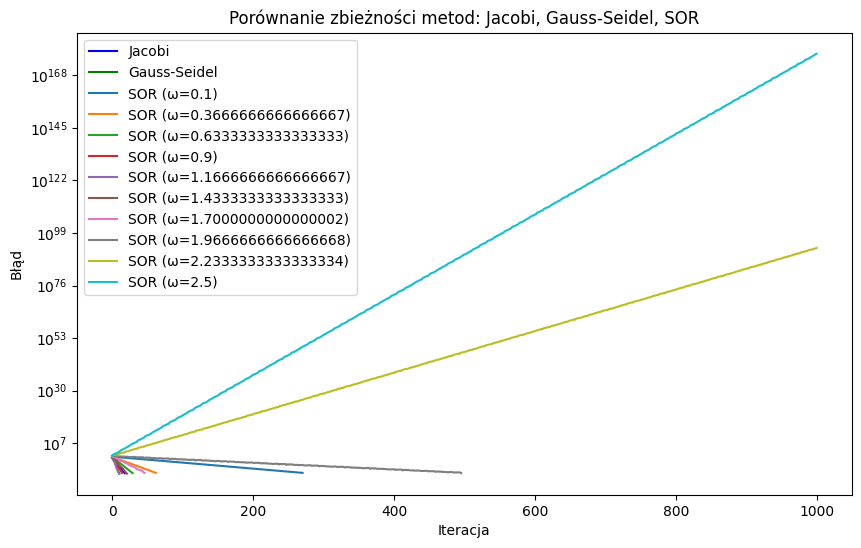

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Metoda Jacobiego
def jacobi(A, b, tol=1e-6, max_iter=1000):
    n = len(b)
    x = np.zeros_like(b)
    x_new = np.zeros_like(b)
    iter_count = 0
    errors = []
    
    while iter_count < max_iter:
        for i in range(n):
            sigma = np.dot(A[i, :], x) - A[i, i] * x[i]
            x_new[i] = (b[i] - sigma) / A[i, i]
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)
        if error < tol:
            break
        x[:] = x_new
        iter_count += 1
        
    return x_new, errors

# Metoda Gaussa-Seidla
def gauss_seidel(A, b, tol=1e-6, max_iter=1000):
    n = len(b)
    x = np.zeros_like(b)
    iter_count = 0
    errors = []
    
    while iter_count < max_iter:
        for i in range(n):
            sigma = np.dot(A[i, :], x) - A[i, i] * x[i]
            x[i] = (b[i] - sigma) / A[i, i]
        error = np.linalg.norm(np.dot(A, x) - b, ord=np.inf)
        errors.append(error)
        if error < tol:
            break
        iter_count += 1
        
    return x, errors

# Metoda Younga (SOR)
def sor(A, b, omega=1.2, tol=1e-6, max_iter=1000):
    n = len(b)
    x = np.zeros_like(b)
    iter_count = 0
    errors = []
    
    while iter_count < max_iter:
        for i in range(n):
            sigma = np.dot(A[i, :], x) - A[i, i] * x[i]
            x[i] = (1 - omega) * x[i] + omega * (b[i] - sigma) / A[i, i]
        error = np.linalg.norm(np.dot(A, x) - b, ord=np.inf)
        errors.append(error)
        if error < tol:
            break
        iter_count += 1
        
    return x, errors

# Funkcja do porównania metod
def compare_methods(A, b, omega_vals=[1.2]):
    methods = ['Jacobi', 'Gauss-Seidel', 'SOR']
    results = {'Jacobi': [], 'Gauss-Seidel': [], 'SOR': {}}
    
    # Test Jacobiego i Gaussa-Seidla
    x_jacobi, errors_jacobi = jacobi(A, b)
    x_gs, errors_gs = gauss_seidel(A, b)
    results['Jacobi'] = errors_jacobi
    results['Gauss-Seidel'] = errors_gs
    
    for omega in omega_vals:
        x_sor, errors_sor = sor(A, b, omega)
        results['SOR'][omega] = errors_sor
    
    return results

# Testowe macierze i wektory b
A1 = np.array([[4, -1, 0, 0], [-1, 4, -1, 0], [0, -1, 4, -1], [0, 0, -1, 3]], dtype=float)
b1 = np.array([15, 10, 10, 10], dtype=float)

# Porównanie metod dla danej macierzy
results = compare_methods(A1, b1, omega_vals=np.linspace(0.1, 2.5, 10))

# Wykresy błędów
plt.figure(figsize=(10, 6))
plt.plot(results['Jacobi'], label='Jacobi', color='blue')
plt.plot(results['Gauss-Seidel'], label='Gauss-Seidel', color='green')

for omega, errors_sor in results['SOR'].items():
    plt.plot(errors_sor, label=f'SOR (ω={omega})')

plt.yscale('log')
plt.xlabel('Iteracja')
plt.ylabel('Błąd')
plt.legend()
plt.title('Porównanie zbieżności metod: Jacobi, Gauss-Seidel, SOR')
plt.show()




## Porównanie rozwiązania za pomocą metody `solve` oraz z użyciem odwrotności na przykładzie macierzy źle uwarunkowanej

***Zadanie 5.***

Dany jest układ równań $Hx=b$.
* H jest macierzą Hilberta o wymiarach $n=5x5$ (I przypadek) i $n=15x15$ (II przypadek),
* b jest wektorem o następujących elementach $b_i = 1/(n + i + 1)$ Uwaga: $i=1,\dots,n$.

Do rozwiązania układu wykorzystaj dwa algorytmy:
1. Z odwracaniem macierzy współczynników H.
2. Metodę `numpy.linalg.solve`.

Porównaj błędy obu rozwiązań. Aby ocenić błąd możesz:
* wyznaczyć wektor residuum otrzymanego rozwiązania,
* rozwiązać układ równań z innym wektorem $b$. Załóż, że wektor rozwiązania ma wszystkie elementy (współrzędne) równe 1 ($u_i = 1, i = 1, 2, . . . , n$). Wtedy $b = Hu$. Układ rozwiążemy bez korzystania z wiedzy o postaci $u$. Dopiero wynik porównamy ze znanym nam $u$.

In [49]:
import numpy as np
from scipy.linalg import hilbert
import matplotlib.pyplot as plt

# Funkcja do rozwiązania układu dwoma metodami
def solve_and_compare(n):
    # Macierz Hilberta
    H = hilbert(n)
    
    # Wektor b (pierwszy przypadek)
    b = np.array([1/(n+i+1) for i in range(n)])
    
    # Rozwiązanie przez odwracanie macierzy
    H_inv = np.linalg.inv(H)
    x_inv = H_inv @ b

    # Rozwiązanie przez numpy.linalg.solve
    x_solve = np.linalg.solve(H, b)
    
    # Residua
    residuum_inv = np.linalg.norm(b - H @ x_inv)
    residuum_solve = np.linalg.norm(b - H @ x_solve)

    print(f"n = {n}")
    print(f"Residuum (odwracanie): {residuum_inv:.2e}")
    print(f"Residuum (solve): {residuum_solve:.2e}")
    print()

    # Drugi test: rozwiązanie gdy u = [1,1,...,1]
    u_exact = np.ones(n)
    b_test = H @ u_exact

    # Rozwiązanie
    x_inv_test = H_inv @ b_test
    x_solve_test = np.linalg.solve(H, b_test)

    # Błąd względem u = [1, ..., 1]
    error_inv = np.linalg.norm(x_inv_test - u_exact)
    error_solve = np.linalg.norm(x_solve_test - u_exact)

    print(f"Błąd względem wektora [1, ..., 1] (odwracanie): {error_inv:.2e}")
    print(f"Błąd względem wektora [1, ..., 1] (solve): {error_solve:.2e}")
    print("-" * 40)

# Przypadek n = 5
solve_and_compare(5)

# Przypadek n = 15
solve_and_compare(15)


n = 5
Residuum (odwracanie): 6.25e-13
Residuum (solve): 8.44e-17

Błąd względem wektora [1, ..., 1] (odwracanie): 9.16e-11
Błąd względem wektora [1, ..., 1] (solve): 3.76e-12
----------------------------------------
n = 15
Residuum (odwracanie): 6.43e-02
Residuum (solve): 5.99e-16

Błąd względem wektora [1, ..., 1] (odwracanie): 1.24e+03
Błąd względem wektora [1, ..., 1] (solve): 1.91e+01
----------------------------------------


**Zadanie domowe. Znaczenie wskaźnika uwarunkowania macierzy w szacowaniu błędu rozwiązania**


Dana jest następująca macierz A współczynników układu dwóch równań liniowy:
$$A=\begin{bmatrix}10^5 & 9.9\cdot10^4\\1.00001& 0.99\end{bmatrix}$$

Wektor prawej strony równania $Ax=b$ dla rozwiązania x = $[1, 1]^T$ możemy wyznaczyć z równości $b = Ax$.

Należy:
* obliczyć wskaźnik uwarunkowania macierzy $A$,
* rozwiązać układ równań $Ax = b$ (nie korzystając z wiedzy o przyjętym rozwiązaniu dokładnym x) korzystając z funkcji `np.linalg.solve`,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania macierzy A,
* przeprowadzić skalowanie tak, aby macierz $A$ była wyważona wierszami,
* wyznaczyć nowe wartości wektora b tak, aby rozwiązanie dokładne się nie
zmieniło,
* obliczyć wskaźnik uwarunkowania macierzy skalowanej,
* rozwiązać układ równań tą samą metodą jak poprzednio,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania skalowanej macierzy $A$.
1. Czy błąd numeryczny rozwiązania w obu przypadkach jest tego samego rzędu?
2. Które szacowanie błędu jest bardziej zbliżone do faktycznego błędu?

In [52]:
import numpy as np

# Dane
A = np.array([[1e5, 9.9e4],
              [1.00001, 0.99]])

x_exact = np.array([1, 1])
b = A @ x_exact

# 1. Wskaźnik uwarunkowania macierzy A
cond_A = np.linalg.cond(A)
print(f"Wskaźnik uwarunkowania macierzy A: {cond_A:.2e}")

# 2. Rozwiązanie układu
x_num = np.linalg.solve(A, b)

# 3. Ocena błędu
error_abs = np.linalg.norm(x_num - x_exact)
relative_error = error_abs / np.linalg.norm(x_exact)

# 4. Szacowany błąd przy wykorzystaniu wskaźnika uwarunkowania
machine_epsilon = np.finfo(float).eps  # Epsilon maszynowy (~2.2e-16)
estimated_error = cond_A * machine_epsilon

print(f"Błąd bezwzględny rozwiązania: {error_abs:.2e}")
print(f"Błąd względny rozwiązania: {relative_error:.2e}")
print(f"Szacowany błąd (cond(A) * epsilon): {estimated_error:.2e}")

print("\n--- Skalowanie macierzy ---")

# 5. Skalowanie macierzy
row_scales = np.max(np.abs(A), axis=1).reshape(-1, 1)
A_scaled = A / row_scales
b_scaled = b / row_scales.flatten()

# 6. Wskaźnik uwarunkowania skalowanej macierzy
cond_A_scaled = np.linalg.cond(A_scaled)
print(f"Wskaźnik uwarunkowania macierzy skalowanej A: {cond_A_scaled:.2e}")

# 7. Rozwiązanie układu skalowanego
x_num_scaled = np.linalg.solve(A_scaled, b_scaled)

# 8. Ocena błędu po skalowaniu
error_abs_scaled = np.linalg.norm(x_num_scaled - x_exact)
relative_error_scaled = error_abs_scaled / np.linalg.norm(x_exact)

# 9. Szacowany błąd dla macierzy skalowanej
estimated_error_scaled = cond_A_scaled * machine_epsilon

print(f"Błąd bezwzględny rozwiązania po skalowaniu: {error_abs_scaled:.2e}")
print(f"Błąd względny rozwiązania po skalowaniu: {relative_error_scaled:.2e}")
print(f"Szacowany błąd po skalowaniu: {estimated_error_scaled:.2e}")


Wskaźnik uwarunkowania macierzy A: 2.00e+10
Błąd bezwzględny rozwiązania: 1.58e-11
Błąd względny rozwiązania: 1.12e-11
Szacowany błąd (cond(A) * epsilon): 4.44e-06

--- Skalowanie macierzy ---
Wskaźnik uwarunkowania macierzy skalowanej A: 4.00e+05
Błąd bezwzględny rozwiązania po skalowaniu: 1.58e-11
Błąd względny rozwiązania po skalowaniu: 1.12e-11
Szacowany błąd po skalowaniu: 8.88e-11
